5.1 Subtask 1:

In the first, you are going to work with the Iris Data Set.

• Load the Data Set (https://bit.ly/3WiUJ7W)

• Plot the first 3 columns of the Data Set and the target column in a
3d scatter plot.

HINT: Use the target column as a hue for the points.

LINK: (https://bit.ly/3SRIsEJ)

• Copy the implementation of the Principal Component Analysis algorithm from SMLH.

• Create an instance of the Scratch-made PCA algorithm using the
eigenvector algorithm.

• Create an instance of the Scratch-made PCA algorithm using the
SVD algorithm.

• Create an instance of sklearn and implement a PCA algorithm.

• Apply StandardScaler from sklearn on the data.

• Train all created instances of PCA on the iris data.

• Use each created instance of PCA to reduce the dimensionality of
the Data Set to 2, creating in such a way 3 separated Data Sets.

• Create a plot that combines 3 scatter plots and plots each of the
result Data Sets in a separate window. Each window should be related
to which version of the PCA was used.
HINT: (https://bit.ly/3DIzAwW)

• Try to conclude what you see by comparing the results of each
algorithm and the 3d scatter plot you made before.

• Retrain a sklearn PCA model on the iris Data Set with n components
set to 1.

• Create a line plot of the explained variance ratio.

• Try to make a conclusion based on that plot.


In [24]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
sklearn.datasets.load_iris
dt=load_iris()
#dt

Fist of all i finded out that dt is just a container with some information not a DataFrame so thats  why commantds like describe and corr were not working

In [26]:
x=dt.target[[10, 25, 50]]

In [27]:
list(dt.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

3D and 2D Visualisation
Because we used 3 dimensional array is better to make a 3d visualistion

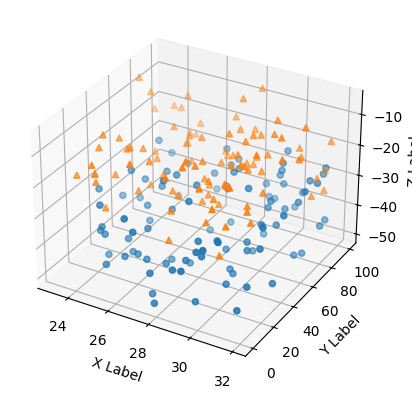

In [28]:
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Principal Component Analysis

In [29]:
X = dt.data
y = dt.target
feature_names = dt.feature_names

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
class MyPCA:
    def __init__(self, n_components=2, method='svd'):
        self.n_components = n_components
        if method in ['svd', 'eigen']:
            self.method = method
        else:
            raise ValueError(f"Unsupported method '{method}'.")

    def fit(self, X):
        if self.method == 'svd':
            _, _, Vt = np.linalg.svd(X, full_matrices=False)
            self.components_ = Vt[:self.n_components]
        elif self.method == 'eigen':
            cov_mat = np.cov(X.T)
            eig_vals, eig_vecs = np.linalg.eig(cov_mat)
            idx = np.argsort(eig_vals)[::-1]
            self.components_ = eig_vecs[:, idx[:self.n_components]].T
            total = np.sum(eig_vals)
            self.explained_variance_ratio_ = [(val / total) for val in eig_vals[idx[:self.n_components]]]
        return self

    def transform(self, X):
        return np.dot(X, self.components_.T)

# **The implementation of PCA from sklearn**

In [32]:
pca_svd = MyPCA(n_components=2, method='svd').fit(X_scaled)
X_svd = pca_svd.transform(X_scaled)

pca_eigen = MyPCA(n_components=2, method='eigen').fit(X_scaled)
X_eigen = pca_eigen.transform(X_scaled)

pca_sklearn = PCA(n_components=2)
X_sklearn = pca_sklearn.fit_transform(X_scaled)

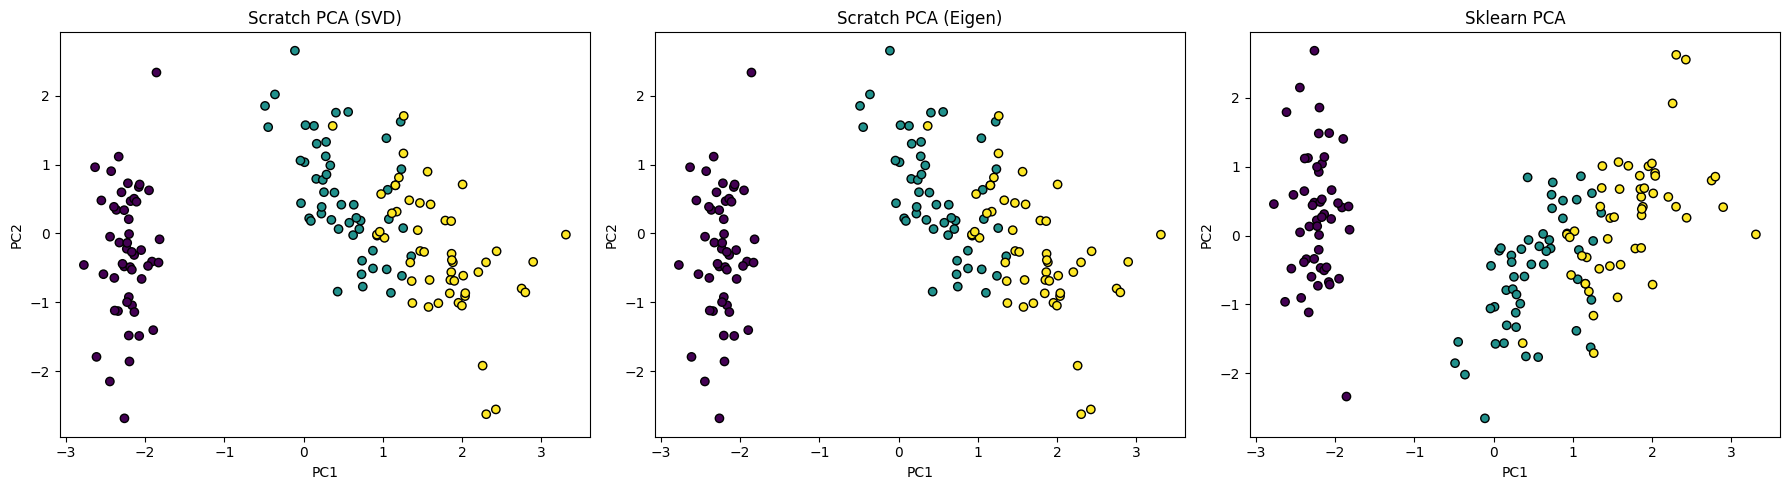

In [33]:
#Визуализация всех 3 реализаций
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Scratch PCA (SVD)', 'Scratch PCA (Eigen)', 'Sklearn PCA']

for ax, X_pca, title in zip(axs, [X_svd, X_eigen, X_sklearn], titles):
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()

Первая главная компонента — это направление в данных, которое захватывает максимально возможную вариацию. Чем ближе точка к 1, тем лучше эта компонента объясняет данные.

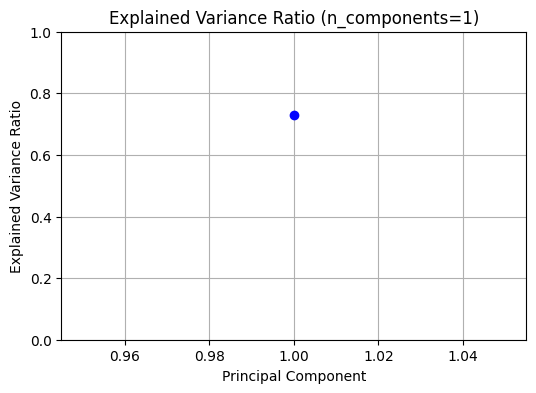

In [35]:
pca_one = PCA(n_components=1)
pca_one.fit(X_scaled)
explained_var_ratio = pca_one.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot([1], explained_var_ratio, 'bo-')
plt.title("Explained Variance Ratio (n_components=1)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

5.2 Subtask 2:

In the second task, you will work with another Data Set - images of
digits:

• First, load the Data Set: (https://bit.ly/3SOwFqL)

• Second plot in a multiple window plot 10 random digits with a title
having the digit from the image on a 2 x 5 grid.

• Create an instance of the sklearn PCA.

• Apply scaling on the digit Data Set.

• Train the PCA on the digit Data Set.

• Reduce the dimensionality of the Data Set to 2 dimensions.

• Plot the new result Data Set in a scatter plot with each point colored
by its digit label

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

P.S. я откомментировала себе код, в тех местах, где у меня возникли вопросы, чтобы просто запомнить.

In [20]:
digits = load_digits()
X = digits.data  # Flattened image data
y = digits.target  # Labels (0–9)
images = digits.images  # 8x8 images

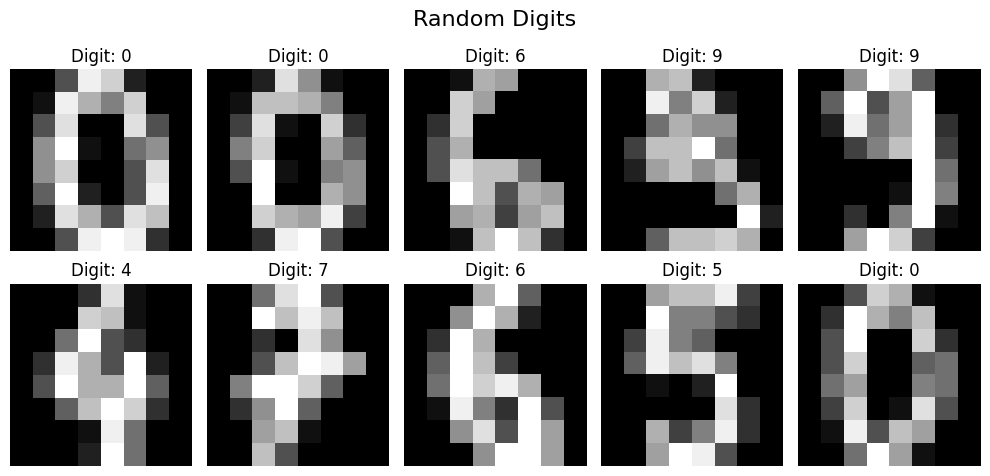

In [21]:
#Plot 10 random digits on a 2x5 grid
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Random Digits", fontsize=16)

random_indices = np.random.choice(len(images), 10, replace=False)

for ax, idx in zip(axs.ravel(), random_indices):
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Digit: {y[idx]}")
    ax.axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show()

An instance of sklearn PCA

In [ ]:
pca = PCA(n_components=2)

Apply scaling on the digit dataset

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train PCA on the digit dataset

In [ ]:
X_pca = pca.fit_transform(X_scaled)

2D анализ данных, как часто какие то значиения встреча..тся, вернее как часто встречатся веса

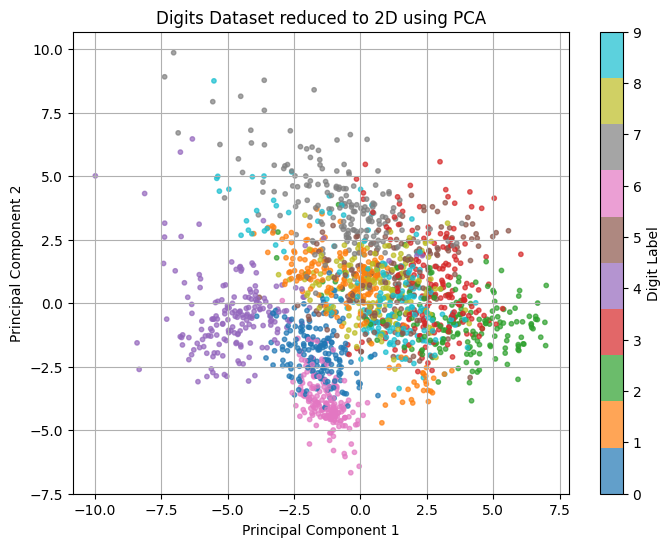

In [22]:
# 2D scatter with points colored by digit label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('Digits Dataset reduced to 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()